In [12]:
#Enter Key Here: B2@2024KAUSTUKICv9YZDN

In [13]:
from IPython.display import clear_output

In [14]:
%pip install torch torchvision
%pip install matplotlib

clear_output()

In [15]:
!echo "Downloading 101_Object_Categories for image notebooks"

!curl -L -o 101_ObjectCategories.zip --progress-bar https://data.caltech.edu/records/mzrjq-6wc02/files/caltech-101.zip?download=1
!unzip 101_ObjectCategories.zip
!mv caltech-101/101_ObjectCategories.tar.gz ./101_ObjectCategories.tar.gz
!tar -xzf 101_ObjectCategories.tar.gz
!rm 101_ObjectCategories.tar.gz
!ls

clear_output()

In [16]:
import random

import torch
from torch.utils.data import Subset

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [17]:
transform = transforms.Compose([
    transforms.ToTensor(),  # hint: Is something missing?
    transforms.Resize((224,224)) # Resnet18 expecting 224*224 size, so resize the whole images
])

image_dataset = torchvision.datasets.ImageFolder(root='101_ObjectCategories', transform=transform)

In [18]:
print(len(image_dataset))

9144


label=0


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


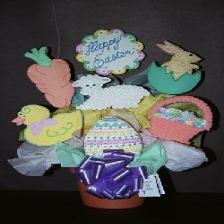

In [19]:
img, label = image_dataset[50]
print(f'{label=}')
transforms.functional.to_pil_image(img)

# Tasks:

1. Download pretrained Resnet18 model from torchhub
2. Modify the model for object 101 dataset subset (The dataset has 101 distinct classes)
3. Split the dataset between training and validation splits.
4. Fine tune the model for classification on the dataset.
5. Output the fine tuned model's overall accuracy
6. Find a way to show label wise performance/accuracy of the finetuned model

In [35]:
import torchvision.models as models
from IPython.display import clear_output
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import models,transforms
from torchvision.utils import make_grid
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader, random_split
import imageio as imo
import os
import time
from sklearn.metrics import classification_report
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
import cv2
from sklearn.metrics import classification_report



In [36]:
image_dataset[1][0].size()

torch.Size([3, 224, 224])

# 1&2 Download pretrained Resnet18 & Modify the model

In [37]:
image_dataset.classes

['BACKGROUND_Google',
 'Faces',
 'Faces_easy',
 'Leopards',
 'Motorbikes',
 'accordion',
 'airplanes',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooste

Num of classes

In [38]:
len(image_dataset.classes)

102

In [39]:

class FineTunedModel(nn. Module):

  def __init__ (self, out_classes = 102):

    super(FineTunedModel, self).__init__()
    self.model = models.resnet18(pretrained=True)

    # for layer in net.parameters(): # freezing layers
    #   layer.requires_grad=False

    # net.conv1=nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) # Add this if you have grey images

    self.fc = nn.Linear(self.model.fc.out_features, out_classes) #2

  def forward(self, x):

    x = self.model(x)
    x = self.fc(x)
    return x

model = FineTunedModel()

# 3. Split the dataset between training and validation splits.

In [40]:
train_size = int(0.8 * len(image_dataset))
test_size = len(image_dataset) - train_size
train_dataset, test_dataset = random_split(image_dataset, [train_size, test_size])

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [43]:
train_dataset[1][0].size()

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 224, 224])

So, It its deminsions are good

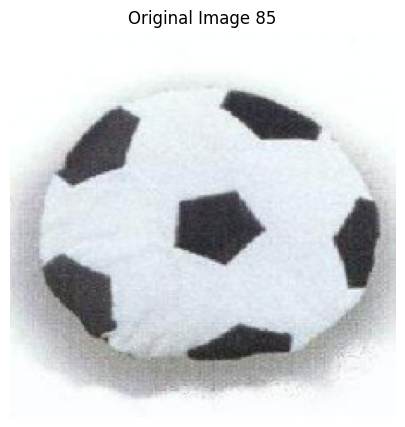

In [44]:
plt.figure(figsize=(10, 5))

plt.imshow(train_dataset[0][0].permute(1,2,0))
plt.title('Original Image ' + str(train_dataset[0][1]))
plt.axis('off')

plt.show()


# 4. FineTunning (Training)

In [45]:
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR
import time

device = 'cuda' if torch.cuda.is_available() else 'cpu'  # checks if machine supports cuda and if it does, we use that, otherwise cpu
print(f'Using device {device}')

num_epochs = 8
train_losses = []
test_losses = []

lr = 0.01 # Learning rate for the SGD optimizer.
momentum = 0.9
weight_decay=5e-4
optimizer = optim.SGD(model.parameters(), lr = lr, momentum = momentum, weight_decay = weight_decay)
learning_rate_scheduler = ExponentialLR(optimizer, 0.9, verbose = False)

criterion = nn.CrossEntropyLoss()  # multi-class

model.to(device)  # we need to send all input tensors as well as our model to this device. by default they are on cpu

start_time = time.time()
for epoch_no in range(num_epochs):
  epoch_start_time = time.time()
  model.train()  # convert to train model. This turns out train-specific layers in the model (if you dont know about them, an example of them is dropout. more on this later)

  epoch_weighted_loss = 0

  for X, y in train_loader:

    X = X.to(device)
    y = y.to(device)

    probs = model(X)
    optimizer.zero_grad()  # need to clear out gradients from previous batch

    loss = criterion(probs, y)

    loss.backward()  # calculate new gradients
    optimizer.step()  # update weights

    epoch_weighted_loss += (len(y)*loss.item())

  # validation time

  model.eval()  # take model to evaluation mode. turn off train-only layers
  correctly_labelled = 0

  with torch.no_grad():  # this makes our model to NOT track gradients

    test_epoch_weighted_loss = 0

    for X, y in test_loader:

      X = X.to(device)
      y = y.to(device)

      probs = model(X)

      loss = criterion(probs, y)
      test_epoch_weighted_loss += (len(y)*loss.item())

      pred = probs.argmax(dim=1)  # convert probailities to labels by picking the label (index) with the highest prob

      correctly_labelled += (pred == y).sum().item()  # item converts tensor to float/int/list

  test_epoch_loss = test_epoch_weighted_loss/len(test_loader.dataset)
  test_losses.append(test_epoch_loss)

  epoch_loss = epoch_weighted_loss/len(train_loader.dataset)
  train_losses.append(epoch_loss)    # add loss for tracking. we'll visualize the loss trajectory later
  learning_rate_scheduler.step() # update learning rate

  epoch_total_time = time.time() - epoch_start_time
  epoch_mins = int(epoch_total_time // 60)
  epoch_secs = int(epoch_total_time % 60)

  print(f'Epoch: {(epoch_no + 1):2d}, train_loss = {epoch_loss:.2f}, val_loss = {test_epoch_loss:.2f}. labelled {correctly_labelled}/{len(test_loader.dataset)} correctly ({(correctly_labelled/len(test_loader.dataset)*100):.2f}% accuracy). Time: {epoch_mins} minutes, {epoch_secs} seconds')

total_time = time.time() - start_time
mins = int(total_time // 60)
secs = int(total_time % 60)

print(f'Total training time: {mins} minutes, {secs} seconds')

Using device cuda
Epoch:  1, train_loss = 0.01, val_loss = 0.26. labelled 1700/1829 correctly (92.95% accuracy). Time: 1 minutes, 10 seconds
Epoch:  2, train_loss = 0.00, val_loss = 0.24. labelled 1711/1829 correctly (93.55% accuracy). Time: 1 minutes, 8 seconds
Epoch:  3, train_loss = 0.00, val_loss = 0.24. labelled 1713/1829 correctly (93.66% accuracy). Time: 1 minutes, 9 seconds
Epoch:  4, train_loss = 0.00, val_loss = 0.23. labelled 1714/1829 correctly (93.71% accuracy). Time: 1 minutes, 5 seconds
Epoch:  5, train_loss = 0.00, val_loss = 0.24. labelled 1715/1829 correctly (93.77% accuracy). Time: 1 minutes, 3 seconds
Epoch:  6, train_loss = 0.00, val_loss = 0.23. labelled 1718/1829 correctly (93.93% accuracy). Time: 1 minutes, 8 seconds
Epoch:  7, train_loss = 0.00, val_loss = 0.23. labelled 1720/1829 correctly (94.04% accuracy). Time: 1 minutes, 6 seconds
Epoch:  8, train_loss = 0.00, val_loss = 0.23. labelled 1718/1829 correctly (93.93% accuracy). Time: 1 minutes, 8 seconds
Total

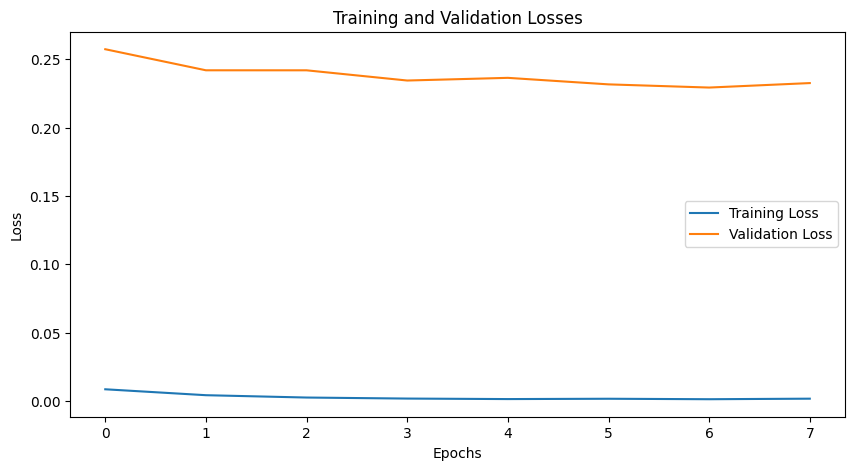

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#5. Output the fine tuned model's overall accuracy

In [52]:
def evaluate_model(model, test_loader): # it does the validation and it outputs the predicted values and target.
    model.eval()
    preds = []
    targets = []
    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(device)
            probs = model(X)
            predicted_classes = torch.argmax(probs, dim=1)
            preds.extend(predicted_classes.cpu().tolist())
            targets.extend(y.cpu().tolist())
    return preds, targets

def calculate_accuracy(preds, targets): # it calculates the accuracywhen given predicted values and target.
    correct = sum(p == t for p, t in zip(preds, targets))
    total = len(targets)
    accuracy = correct / total * 100
    return correct, total, accuracy


In [57]:
def print_class_accuracy(preds, targets, class_names): #  pring and calculate accuracy for each class given the predicted values, target labels, and class names.
    class_correct = {class_name: 0 for class_name in class_names}
    class_total = {class_name: 0 for class_name in class_names}
    class_accuracy = []

    for pred, target in zip(preds, targets):
        if pred == target:
            class_correct[class_names[target]] += 1
        class_total[class_names[target]] += 1

    for class_name in class_names:
        accuracy = class_correct[class_name] / class_total[class_name] * 100 if class_total[class_name] > 0 else 0
        class_accuracy.append(accuracy)
        print(f'Class: {class_name:17s} | Accuracy: {accuracy:.2f}%')

    return class_accuracy


In [58]:
preds, targets = evaluate_model(model, test_loader)
correct, total, accuracy = calculate_accuracy(preds, targets)
print('Overall Accuracy:')
print(f'labelled {correct}/{len(test_loader.dataset)} correctly ({(correct/len(test_loader.dataset)*100):.2f}% accuracy).')


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Overall Accuracy:
labelled 1718/1829 correctly (93.93% accuracy).


# 6.label wise performance/accuracy

In [59]:
class_accuracy = print_class_accuracy(preds, targets, image_dataset.classes) # Just accuracy

Class: BACKGROUND_Google | Accuracy: 79.55%
Class: Faces             | Accuracy: 100.00%
Class: Faces_easy        | Accuracy: 97.70%
Class: Leopards          | Accuracy: 100.00%
Class: Motorbikes        | Accuracy: 100.00%
Class: accordion         | Accuracy: 100.00%
Class: airplanes         | Accuracy: 99.38%
Class: anchor            | Accuracy: 62.50%
Class: ant               | Accuracy: 100.00%
Class: barrel            | Accuracy: 100.00%
Class: bass              | Accuracy: 69.23%
Class: beaver            | Accuracy: 71.43%
Class: binocular         | Accuracy: 100.00%
Class: bonsai            | Accuracy: 100.00%
Class: brain             | Accuracy: 95.83%
Class: brontosaurus      | Accuracy: 71.43%
Class: buddha            | Accuracy: 95.00%
Class: butterfly         | Accuracy: 80.00%
Class: camera            | Accuracy: 100.00%
Class: cannon            | Accuracy: 57.14%
Class: car_side          | Accuracy: 100.00%
Class: ceiling_fan       | Accuracy: 85.71%
Class: cellphone      

In [60]:
performance=(classification_report(targets, preds, target_names=image_dataset.classes)) # for more performnce info
print(performance)

                   precision    recall  f1-score   support

BACKGROUND_Google       0.81      0.80      0.80        88
            Faces       0.97      1.00      0.99        78
       Faces_easy       1.00      0.98      0.99        87
         Leopards       0.97      1.00      0.99        37
       Motorbikes       0.99      1.00      0.99       173
        accordion       1.00      1.00      1.00         8
        airplanes       1.00      0.99      1.00       161
           anchor       0.71      0.62      0.67         8
              ant       1.00      1.00      1.00         5
           barrel       1.00      1.00      1.00         7
             bass       1.00      0.69      0.82        13
           beaver       0.83      0.71      0.77         7
        binocular       1.00      1.00      1.00         4
           bonsai       0.94      1.00      0.97        29
            brain       1.00      0.96      0.98        24
     brontosaurus       0.71      0.71      0.71       

#I will try to do ensembling and see if it makes better accuracy

In [61]:

class FreezingFineTunedModel(nn. Module):

  def __init__ (self, out_classes = 102):

    super(FreezingFineTunedModel, self).__init__()
    self.model = models.resnet18(pretrained=True)

    for layer in model.parameters(): # freezing layers
      layer.requires_grad=False

    self.fc = nn.Linear(self.model.fc.out_features, out_classes)

  def forward(self, x):

    x = self.model(x)
    x = self.fc(x)
    return x

model2 = FreezingFineTunedModel()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [62]:
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR
import time

device = 'cuda' if torch.cuda.is_available() else 'cpu'  # checks if machine supports cuda and if it does, we use that, otherwise cpu
print(f'Using device {device}')

num_epochs = 8
train_losses = []
test_losses = []

lr = 0.01 # Learning rate for the SGD optimizer.
momentum = 0.9
weight_decay=5e-4
optimizer = optim.SGD(model2.parameters(), lr = lr, momentum = momentum, weight_decay = weight_decay)
learning_rate_scheduler = ExponentialLR(optimizer, 0.9, verbose = False)

criterion = nn.CrossEntropyLoss()  # multi-class

model2.to(device)  # we need to send all input tensors as well as our model to this device. by default they are on cpu

start_time = time.time()
for epoch_no in range(num_epochs):
  epoch_start_time = time.time()
  model2.train()  # convert to train model. This turns out train-specific layers in the model (if you dont know about them, an example of them is dropout. more on this later)

  epoch_weighted_loss = 0

  for X, y in train_loader:

    X = X.to(device)
    y = y.to(device)

    probs = model2(X)
    optimizer.zero_grad()  # need to clear out gradients from previous batch

    loss = criterion(probs, y)

    loss.backward()  # calculate new gradients
    optimizer.step()  # update weights

    epoch_weighted_loss += (len(y)*loss.item())

  # validation time

  model2.eval()  # take model to evaluation mode. turn off train-only layers
  correctly_labelled = 0

  with torch.no_grad():  # this makes our model to NOT track gradients

    test_epoch_weighted_loss = 0

    for X, y in test_loader:

      X = X.to(device)
      y = y.to(device)

      probs = model2(X)

      loss = criterion(probs, y)
      test_epoch_weighted_loss += (len(y)*loss.item())

      pred = probs.argmax(dim=1)  # convert probailities to labels by picking the label (index) with the highest prob

      correctly_labelled += (pred == y).sum().item()  # item converts tensor to float/int/list

  test_epoch_loss = test_epoch_weighted_loss/len(test_loader.dataset)
  test_losses.append(test_epoch_loss)

  epoch_loss = epoch_weighted_loss/len(train_loader.dataset)
  train_losses.append(epoch_loss)    # add loss for tracking. we'll visualize the loss trajectory later
  learning_rate_scheduler.step() # update learning rate

  epoch_total_time = time.time() - epoch_start_time
  epoch_mins = int(epoch_total_time // 60)
  epoch_secs = int(epoch_total_time % 60)

  print(f'Epoch: {(epoch_no + 1):2d}, train_loss = {epoch_loss:.2f}, val_loss = {test_epoch_loss:.2f}. labelled {correctly_labelled}/{len(test_loader.dataset)} correctly ({(correctly_labelled/len(test_loader.dataset)*100):.2f}% accuracy). Time: {epoch_mins} minutes, {epoch_secs} seconds')

total_time = time.time() - start_time
mins = int(total_time // 60)
secs = int(total_time % 60)

print(f'Total training time: {mins} minutes, {secs} seconds')

Using device cuda


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch:  1, train_loss = 1.10, val_loss = 0.86. labelled 1443/1829 correctly (78.90% accuracy). Time: 1 minutes, 8 seconds
Epoch:  2, train_loss = 0.19, val_loss = 0.35. labelled 1668/1829 correctly (91.20% accuracy). Time: 1 minutes, 1 seconds
Epoch:  3, train_loss = 0.04, val_loss = 0.26. labelled 1703/1829 correctly (93.11% accuracy). Time: 1 minutes, 0 seconds
Epoch:  4, train_loss = 0.01, val_loss = 0.23. labelled 1719/1829 correctly (93.99% accuracy). Time: 0 minutes, 58 seconds
Epoch:  5, train_loss = 0.01, val_loss = 0.22. labelled 1722/1829 correctly (94.15% accuracy). Time: 0 minutes, 58 seconds
Epoch:  6, train_loss = 0.00, val_loss = 0.22. labelled 1720/1829 correctly (94.04% accuracy). Time: 0 minutes, 58 seconds
Epoch:  7, train_loss = 0.00, val_loss = 0.22. labelled 1729/1829 correctly (94.53% accuracy). Time: 0 minutes, 58 seconds
Epoch:  8, train_loss = 0.00, val_loss = 0.22. labelled 1726/1829 correctly (94.37% accuracy). Time: 0 minutes, 58 seconds
Total training time

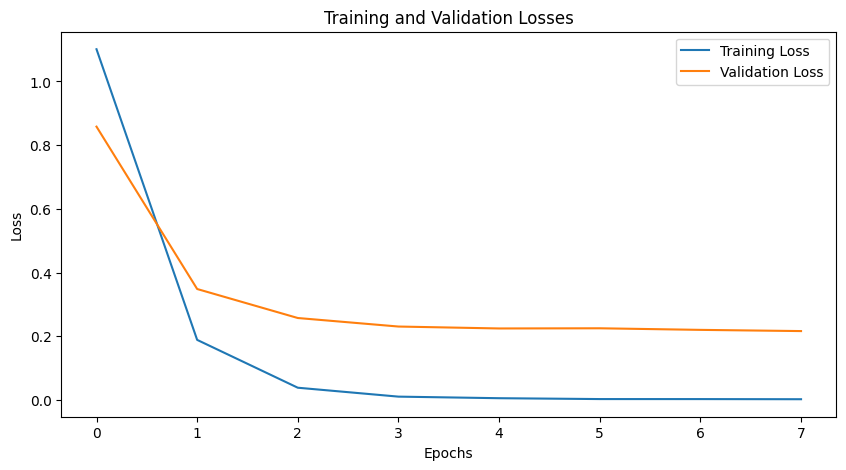

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

calculate label wise accuracy, and overall

In [64]:
preds2, targets2 = evaluate_model(model2, test_loader)
correct2, total2, accuracy2 = calculate_accuracy(preds2, targets2)
print("Overall accuracy:")
print(f'labelled {correct2}/{len(test_loader.dataset)} correctly ({(correct2/len(test_loader.dataset)*100):.2f}% accuracy).')

Overall accuracy:
labelled 1726/1829 correctly (94.37% accuracy).


In [65]:
class_accuracy2 = print_class_accuracy(preds2, targets2, image_dataset.classes) # to show the label wise accuracy only

Class: BACKGROUND_Google | Accuracy: 85.23%
Class: Faces             | Accuracy: 98.72%
Class: Faces_easy        | Accuracy: 97.70%
Class: Leopards          | Accuracy: 100.00%
Class: Motorbikes        | Accuracy: 100.00%
Class: accordion         | Accuracy: 100.00%
Class: airplanes         | Accuracy: 100.00%
Class: anchor            | Accuracy: 62.50%
Class: ant               | Accuracy: 80.00%
Class: barrel            | Accuracy: 100.00%
Class: bass              | Accuracy: 92.31%
Class: beaver            | Accuracy: 71.43%
Class: binocular         | Accuracy: 100.00%
Class: bonsai            | Accuracy: 100.00%
Class: brain             | Accuracy: 95.83%
Class: brontosaurus      | Accuracy: 100.00%
Class: buddha            | Accuracy: 95.00%
Class: butterfly         | Accuracy: 93.33%
Class: camera            | Accuracy: 100.00%
Class: cannon            | Accuracy: 85.71%
Class: car_side          | Accuracy: 100.00%
Class: ceiling_fan       | Accuracy: 92.86%
Class: cellphone      

In [66]:
performance2=(classification_report(targets2, preds2, target_names=image_dataset.classes)) # for more performance info
print(performance2)

                   precision    recall  f1-score   support

BACKGROUND_Google       0.82      0.85      0.83        88
            Faces       0.99      0.99      0.99        78
       Faces_easy       1.00      0.98      0.99        87
         Leopards       1.00      1.00      1.00        37
       Motorbikes       1.00      1.00      1.00       173
        accordion       1.00      1.00      1.00         8
        airplanes       0.99      1.00      1.00       161
           anchor       1.00      0.62      0.77         8
              ant       0.80      0.80      0.80         5
           barrel       0.88      1.00      0.93         7
             bass       0.86      0.92      0.89        13
           beaver       1.00      0.71      0.83         7
        binocular       0.57      1.00      0.73         4
           bonsai       0.94      1.00      0.97        29
            brain       0.96      0.96      0.96        24
     brontosaurus       0.58      1.00      0.74       

# Now I will see which model has better accuracy at each label, and if they have differnet predictions, then the model that has better accuracy at that label its prediction will be taken

In [67]:
def ensemble_accuracy(preds1, preds2, labels, acc1, acc2, class_names=None):
    """
    Calculate accuracy for each class and total accuracy based on the predictions of two models.
    If predictions differ, choose the prediction of the model with higher accuracy for that class.

    Args:
    - preds1 (list): Predictions of model 1.
    - preds2 (list): Predictions of model 2.
    - labels (list): Ground truth labels.
    - acc1 (list): Accuracy for each class of model 1.
    - acc2 (list): Accuracy for each class of model 2.
    - class_names (list): List of class names.

    Returns:
    - class_accuracy (list): Accuracy for each class.
    - total_accuracy (float): Total accuracy.
    """
    num_classes = len(labels)
    class_correct = [0] * num_classes
    class_total = [0] * num_classes
    final_preds = []

    for pred1, pred2, label in zip(preds1, preds2, labels):
        # Find the index of the class
        idx = int(label)

        # If predictions are the same, update accuracy for the class
        if pred1 == pred2:
          final_preds.append(pred1)
          if (pred1 == label):
            class_correct[idx] += 1
        else:
            # Choose the prediction of the model with higher accuracy for this class
            if acc1[idx] > acc2[idx]:
                pred = pred1
            else:
                pred = pred2
            final_preds.append(pred)
            if pred == label:
                class_correct[idx] += 1

        class_total[idx] += 1

    class_accuracy = [class_correct[i] / class_total[i] if class_total[i] > 0 else 0 for i in range(num_classes)]
    total_accuracy = sum(class_correct) / sum(class_total) if sum(class_total) > 0 else 0

    if class_names:
        for i, class_name in enumerate(class_names):
            print(f"{class_name:20s} | Accuracy: {class_accuracy[i]*100:.2f}%")
    else:
        print("Accuracy for each class:", class_accuracy)
    print(f'Total accuracy: {total_accuracy*100:.2f}%')

    return class_accuracy, total_accuracy, final_preds


In [68]:
_,_, final_preds = ensemble_accuracy(preds, preds2, targets, class_accuracy, class_accuracy2, image_dataset.classes)

BACKGROUND_Google    | Accuracy: 85.23%
Faces                | Accuracy: 100.00%
Faces_easy           | Accuracy: 97.70%
Leopards             | Accuracy: 100.00%
Motorbikes           | Accuracy: 100.00%
accordion            | Accuracy: 100.00%
airplanes            | Accuracy: 100.00%
anchor               | Accuracy: 62.50%
ant                  | Accuracy: 100.00%
barrel               | Accuracy: 100.00%
bass                 | Accuracy: 92.31%
beaver               | Accuracy: 71.43%
binocular            | Accuracy: 100.00%
bonsai               | Accuracy: 100.00%
brain                | Accuracy: 95.83%
brontosaurus         | Accuracy: 100.00%
buddha               | Accuracy: 95.00%
butterfly            | Accuracy: 93.33%
camera               | Accuracy: 100.00%
cannon               | Accuracy: 85.71%
car_side             | Accuracy: 100.00%
ceiling_fan          | Accuracy: 92.86%
cellphone            | Accuracy: 100.00%
chair                | Accuracy: 90.91%
chandelier           | Accu